# Parkinson's Electrophysiological Signal Dataset (PESD) Exploration

*This notebook was AI-generated with `dandi-notebook-gen` and has not been fully verified. Please use caution when interpreting results or code.*

This notebook provides an introductory exploration of Dandiset **001333**, which contains electrophysiological signals from both healthy and Parkinsonian subjects.

It demonstrates how to access the data, inspect its structure, and visualize beta band neural activity extracted from the subthalamic nucleus (STN).

The dataset includes:
- **Beta Average Rectified Voltage (ARV)**: reflecting power in the beta frequency range
- **Local Field Potentials (LFPs)**: raw synchronized neural signals

For details, see: [Dataset Citation](https://dandiarchive.org/dandiset/001333/draft)

*More information: "Preliminary Results of Neuromorphic Controller Design and a Parkinson's Disease Dataset Building for Closed-Loop Deep Brain Stimulation" ([arXiv link](https://arxiv.org/abs/2407.17756))*

## Load Dependencies and List Assets in the Dandiset

In [1]:
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("001333")
assets = list(dandiset.get_assets())
print(f"Total assets in dandiset: {len(assets)}")
print("Example assets:")
for a in assets[:5]:
    print(a.path)

Total assets in dandiset: 52
Example assets:
sub-healthy-simulated-data/sub-healthy-simulated-data_ses-001_ecephys.nwb
sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-218_ecephys.nwb
sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-279_ecephys.nwb
sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-423_ecephys.nwb
sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb


## Download or Access a Sample NWB File
This example uses one NWB file -
`sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-1044_ecephys.nwb`

You can download it from DANDI manually, or via the DANDI API.
Here, we use a pre-downloaded local file.

In [2]:
# Local path to an example NWB file (already downloaded for this notebook)
nwb_file_path = "tmp_scripts/sample_file.nwb"

## Inspect the NWB File Structure
This illustrates how to open NWB files using `h5py` (for quick structural review).

**Note:** For larger scale analysis or higher-level operations, consider using `pynwb`.

In [3]:
import h5py

with h5py.File(nwb_file_path, "r") as f:
    print("Top-level groups:")
    for key in f.keys():
        print(f" - {key}")

    if 'processing' in f:
        print("\nProcessing modules:")
        for proc_name in f['processing'].keys():
            print(f" - {proc_name}")

Top-level groups:
 - acquisition
 - analysis
 - file_create_date
 - general
 - identifier
 - processing
 - session_description
 - session_start_time
 - specifications
 - stimulus
 - timestamps_reference_time

Processing modules:
 - ecephys


## Extract and Plot Beta Band Voltage Data

The following code extracts beta band power data from the sample file and visualizes it over time.

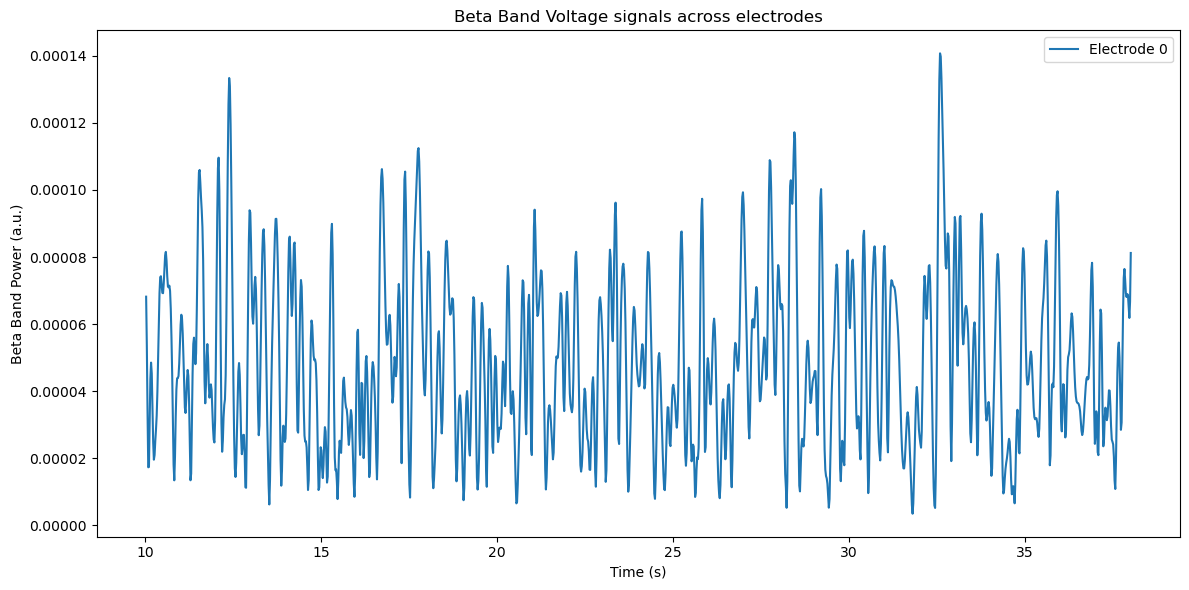

In [4]:
import numpy as np
import matplotlib.pyplot as plt

with h5py.File(nwb_file_path, "r") as f:
    group = f["processing"]["ecephys"]["LFP"]["Beta_Band_Voltage"]
    data = group["data"][:]            
    timestamps = group["timestamps"][:]
    electrodes = group["electrodes"][:]

if data.ndim == 1 and electrodes.shape[0] > 1:
    try:
        data = data.reshape((electrodes.shape[0], -1))
    except:
        data = data.reshape((1, -1))
elif data.ndim == 1:
    data = data.reshape((1, -1))

plt.figure(figsize=(12,6))
for i, elec_id in enumerate(electrodes):
    if i >= data.shape[0]:
        break
    plt.plot(timestamps, data[i], label=f'Electrode {elec_id}')
plt.xlabel("Time (s)")
plt.ylabel("Beta Band Power (a.u.)")
plt.title("Beta Band Voltage signals across electrodes")
plt.legend()
plt.tight_layout()
plt.show()

The above plot demonstrates oscillatory beta activity in STN signals from the sample data.
This kind of visualization aids in understanding neural dynamics relevant to Parkinson's symptoms.

The signals correspond to beta band envelope fluctuations, typically centered ~13-30 Hz, computed via ARV metrics from LFPs.

## Next Steps & Advanced Analysis
Depending on your analysis goals, additional steps might include:
- Loading raw LFP signals for spectral analysis
- Comparing Parkinsonian vs. control subject signals
- Analyzing beta coherence between brain regions
- Statistical testing of oscillatory changes under different conditions

Due to computational requirements, these advanced analyses are beyond this demo notebook’s scope.

## Summary
This Jupytext notebook explored:
- Accessing the metadata and assets of Dandiset 001333
- Loading an example NWB file containing beta oscillation metrics
- Visualizing beta band power envelope data

You can extend these examples to incorporate additional files, perform more complex analyses, and customize visualization to your study objectives.